### Сборный  проект 1.
Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В качестве исходных данных мы будем использовать один датасет со следуюшим наполнением:

Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.


Содержание:

<a href='#the_destination'>Рассмотрим и подготовим данныеданные</a>

<a href='#1'>Проведем исследовательский анализ данных</a>

<a href='#2'>Составим портрет пользователя каждого региона</a>

<a href='#3'>Проверим гипотезы</a>

<a href='#4'>Сделаем общие выводы</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import scipy
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\litvinskaya.m\Desktop\Материалы курса Яндекс.Практикум\ноутбуки\сборный проект 1\games.csv')

посмотрим на данные <a id='the_destination'></a>

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

подготовим данные

In [4]:
df.set_axis(df.columns.str.lower(), axis='columns', inplace=True)
df.sample(5)

name platform  year_of_release         genre  \
1870  Star Ocean: The Second Story       PS           1998.0  Role-Playing   
9459              Illusion of Gaia     SNES           1993.0  Role-Playing   
258              Kingdom Hearts II      PS2           2005.0  Role-Playing   
9304    Queen's Gate: Spiral Chaos      PSP           2011.0  Role-Playing   
4536             Backyard Baseball      GBA           2002.0        Sports   

      na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1870      0.26      0.10      0.72         0.02          80.0        8.5   
9459      0.00      0.00      0.13         0.00           NaN        NaN   
258       2.20      0.58      1.38         0.17          87.0          9   
9304      0.00      0.00      0.14         0.00           NaN        NaN   
4536      0.31      0.11      0.00         0.01           NaN        NaN   

     rating  
1870      E  
9459    NaN  
258    E10+  
9304    NaN  
4536    NaN

In [6]:
df.dropna(subset=['name','genre'],inplace=True)

In [7]:
year=df.pivot_table(index=['name','platform'],values='year_of_release',aggfunc='first')
year.dropna(inplace=True)
year=year.pivot_table(index=['name'],values='year_of_release',aggfunc='first')
year.reset_index(inplace=True)
df['year_of_release'].fillna(df['year_of_release'].map(year['year_of_release']),inplace=True)

In [8]:
df.dropna(subset=['year_of_release'],inplace=True)
df['rating']=df['rating'].fillna('undefind')

избавимся от данных без года выпуска.Они мешают для дальнейшего анализа, занимают малую часть данных, и бесполезны для большей части дальнейшего анализа

In [9]:
df['year_of_release']=pd.to_datetime(df['year_of_release'],format='%Y')
df['year_of_release']=df['year_of_release'].dt.year
df.sample(5)

name platform  year_of_release    genre  \
5458                                Hulk       XB             2003   Action   
9911                  MX vs. ATV Untamed       DS             2007   Racing   
7179  Rock Band Track Pack: Classic Rock      Wii             2009     Misc   
567          Call Of Duty 2: Big Red One      PS2             2005  Shooter   
7114                           Rogue Ops      PS2             2003   Action   

      na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
5458      0.25      0.07      0.00         0.01          69.0        7.7   
9911      0.11      0.00      0.00         0.01          61.0        tbd   
7179      0.21      0.00      0.00         0.02           NaN        tbd   
567       1.48      0.92      0.01         0.26          77.0        8.2   
7114      0.11      0.09      0.00         0.03          61.0        9.2   

     rating  
5458      T  
9911      E  
7179      T  
567       T  
7114      M

user score- tbs, means To be demandet, на данный момент рассмотрим это как отсутсвие оценки, то же самое для rating RP=Rating Pending.Оценка еще не выставлена,рассмотрим как отсутствие оценки

In [10]:
df['user_score']=pd.to_numeric(df['user_score'],errors = 'coerce')
df['rating']=df['rating'].fillna(0)

In [11]:
df['name']=df['name'].str.lower()
df['platform']=df['platform'].str.lower()
df['genre']=df['genre'].str.lower()
df=df.drop_duplicates().reset_index(drop=True)
df.head(15)

name platform  year_of_release         genre  \
0                    wii sports      wii             2006        sports   
1             super mario bros.      nes             1985      platform   
2                mario kart wii      wii             2008        racing   
3             wii sports resort      wii             2009        sports   
4      pokemon red/pokemon blue       gb             1996  role-playing   
5                        tetris       gb             1989        puzzle   
6         new super mario bros.       ds             2006      platform   
7                      wii play      wii             2006          misc   
8     new super mario bros. wii      wii             2009      platform   
9                     duck hunt      nes             1984       shooter   
10                   nintendogs       ds             2005    simulation   
11                mario kart ds       ds             2005        racing   
12  pokemon gold/pokemon silver       gb             1999  role-playing   
13                      wii fit      wii             2007        sports   
14           kinect adventures!     x360             2010          misc   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0      41.36     28.96      3.77         8.45          76.0         8.0   
1      29.08      3.58      6.81         0.77           NaN         NaN   
2      15.68     12.76      3.79         3.29          82.0         8.3   
3      15.61     10.93      3.28         2.95          80.0         8.0   
4      11.27      8.89     10.22         1.00           NaN         NaN   
5      23.20      2.26      4.22         0.58           NaN         NaN   
6      11.28      9.14      6.50         2.88          89.0         8.5   
7      13.96      9.18      2.93         2.84          58.0         6.6   
8      14.44      6.94      4.70         2.24          87.0         8.4   
9      26.93      0.63      0.28         0.47           NaN         NaN   
10      9.05     10.95      1.93         2.74           NaN         NaN   
11      9.71      7.47      4.13         1.90          91.0         8.6   
12      9.00      6.18      7.20         0.71           NaN         NaN   
13      8.92      8.03      3.60         2.15          80.0         7.7   
14     15.00      4.89      0.24         1.69          61.0         6.3   

      rating  
0          E  
1   undefind  
2          E  
3          E  
4   undefind  
5   undefind  
6          E  
7          E  
8          E  
9   undefind  
10  undefind  
11         E  
12  undefind  
13         E  
14         E

поищем оценки одних и тех же игр на других платформах

In [12]:
scores=df.pivot_table(index=['name','platform'],values='rating',aggfunc='first')
scores.dropna(inplace=True)
scores=scores.pivot_table(index=['name'],values='rating',aggfunc='first')
scores.reset_index(inplace=True)
df['rating'].fillna(df['rating'].map(scores['rating']),inplace=True)
scores.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


прочая замена данных на основе имеющихся данных невозможна.

посчитаем суммарные продажи во всех регионах:

In [13]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.sample(5)

name platform  \
15887                             don bradman cricket 14      ps3   
6708   percy jackson and the olympians: the lightning...       ds   
14197                                      dance factory      ps2   
2299                                              cars 2      wii   
14725                          bode miller alpine skiing      ps2   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
15887             2014        sports      0.00      0.01       0.0   
6708              2010  role-playing      0.22      0.01       0.0   
14197             2006        action      0.02      0.01       0.0   
2299              2011        racing      0.43      0.37       0.0   
14725             2006        sports      0.01      0.01       0.0   

       other_sales  critic_score  user_score    rating  total_sales  
15887         0.00          73.0         6.9         E         0.01  
6708          0.02          56.0         6.9      E10+         0.25  
14197         0.00          56.0         5.8         E         0.03  
2299          0.09           NaN         NaN  undefind         0.89  
14725         0.00           NaN         6.6         E         0.02

переведем цифры в int

In [14]:
df['user_score']=df['user_score'].astype('float')
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [15]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.3+ MB


### Проведем исследовательский анализ данных
<a id='1'></a>

сколько игра выпускалось в разные годы, важны ли все переоды?

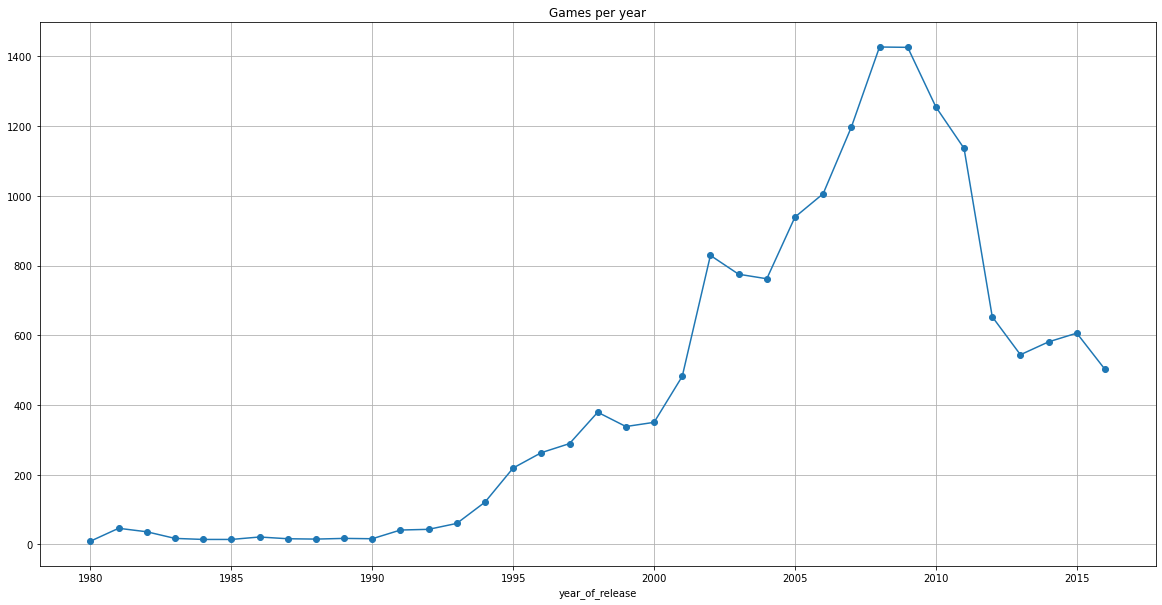

In [16]:
er=df.groupby('year_of_release')['name'].count().plot(style='o-',x='year_of_release',figsize=(20,10),grid=True,title='Games per year')



Статистика по играм до 2001 года точно не имеет значения, индустрия зарождалась, и, по сравнению с нынешнем количеством выпускаемых игр-игр было мало.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [17]:
top=df.pivot_table(index=['platform'],values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)
print(top)

          total_sales
platform             
ps2           1233.56
x360           961.24
ps3            931.34
wii            891.18
ds             802.78
ps             727.58
ps4            314.14
gba            312.88
psp            289.53
3ds            257.81
pc             255.76
gb             254.43
xb             251.57
nes            251.05
n64            218.01
snes           200.04
gc             196.73
xone           159.32
2600            86.48
wiiu            82.19
psv             53.81
sat             33.59
gen             28.35
dc              15.95
scd              1.86
ng               1.44
ws               1.42
tg16             0.16
3do              0.10
gg               0.04
pcfx             0.03


продажи по первым 6 платформам значительно превышают все остальные

In [18]:
top6=df.query('platform in ("ps2","x360","ps3","wii","ds","ps")')

Text(0.5, 1.0, 'Распределение продаж по годам')

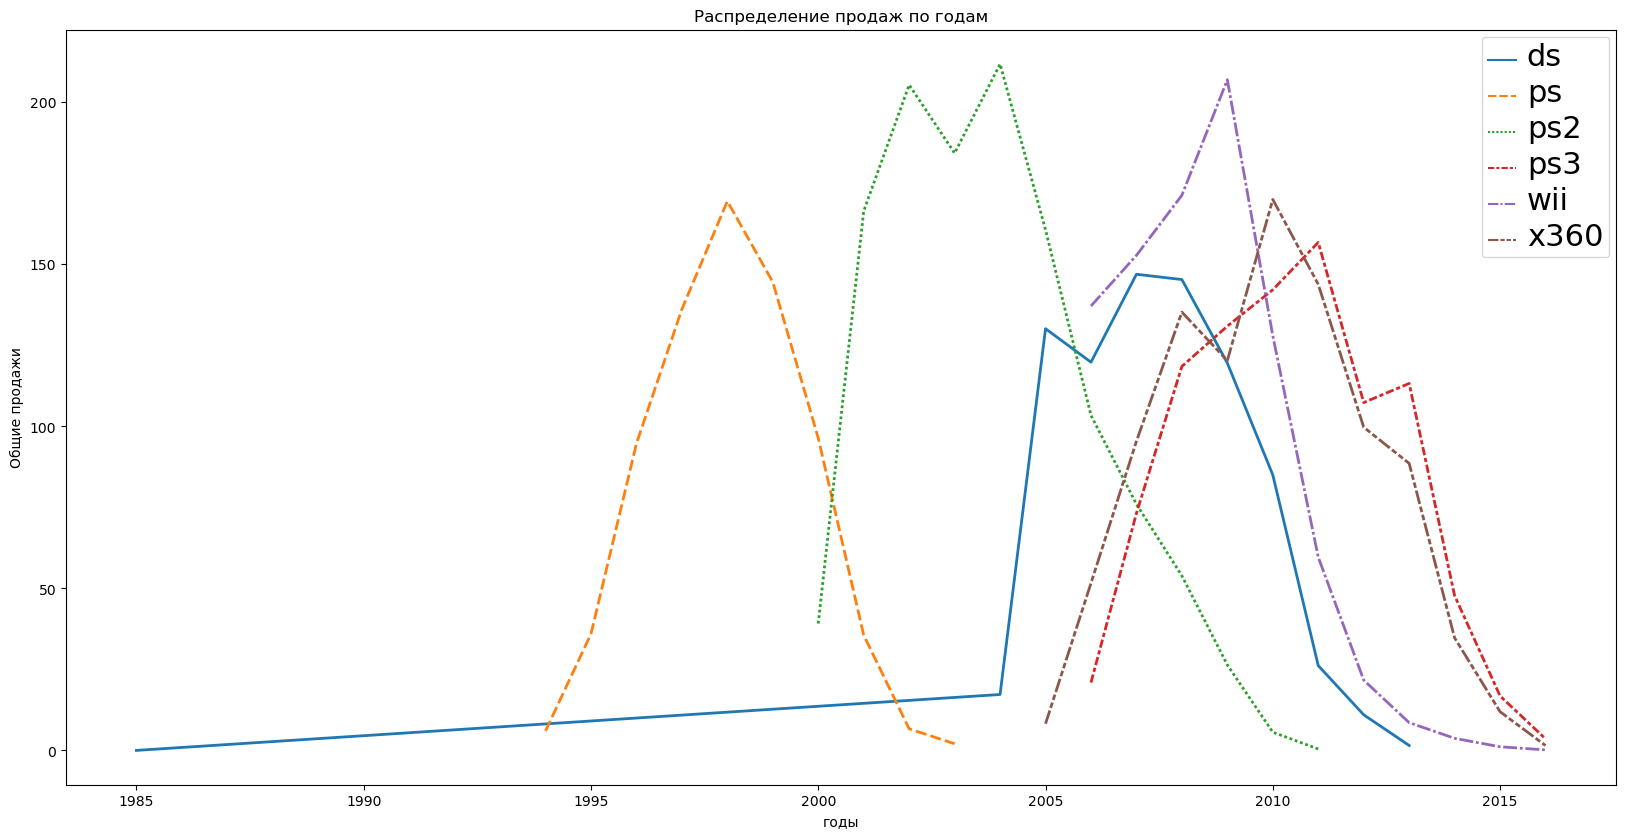

In [19]:
plt.figure(figsize=(20,10),dpi=100)
ax=sns.lineplot(data=top6.pivot_table(index=['year_of_release'],columns='platform',values='total_sales',aggfunc='sum'),hue='year_of_release',linewidth = 2)
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
plt.xlabel('годы')
plt.ylabel('Общие продажи')
plt.title('Распределение продаж по годам')


средняя продолжительность жизни платформы 10 лет

Согласно графику выпуска игр, данные до 2001 можно смело отсекать. Так же средняя продолжительность жизни платформы составляет 10 лет, что, при построении прогноза на 2017 год может намекать на то, что данные ранее 2007 нам тоже не нужны. Посмотрим какие платформы существовали последние 10 лет, у кого рост, только начался, а кто уходит с рынка.

In [20]:
ten_years=df.query('year_of_release>=2013')
ten_years.pivot_table(index=['platform'],columns='year_of_release',values='total_sales',aggfunc='sum')

year_of_release    2013    2014    2015   2016
platform                                      
3ds               56.57   43.76   27.78  15.14
ds                 1.54     NaN     NaN    NaN
pc                12.38   13.28    8.52   5.25
ps3              113.25   47.76   16.82   3.60
ps4               25.99  100.00  118.90  69.25
psp                3.14    0.24    0.12    NaN
psv               10.59   11.90    6.25   4.25
wii                8.59    3.75    1.14   0.18
wiiu              21.65   22.03   16.35   4.60
x360              88.58   34.74   11.96   1.52
xone              18.96   54.07   60.14  26.15

к 2016 году все имеющиеся в наших данных платформы уже перевалили за пик своей популярности. Самой прибыльной пока что является PS4-но и у нее продажи пошли на спад. В целом в 2017 можно ожидать продажи по pc,ps3,ps4,psv,wiiu,x360,xone,3ds.Оставим только их

In [21]:
ten_years=ten_years.query('platform in ("ps4","x360","xone","ps3","wiiu","3ds","pc","psv")')

(0.0, 2.0)

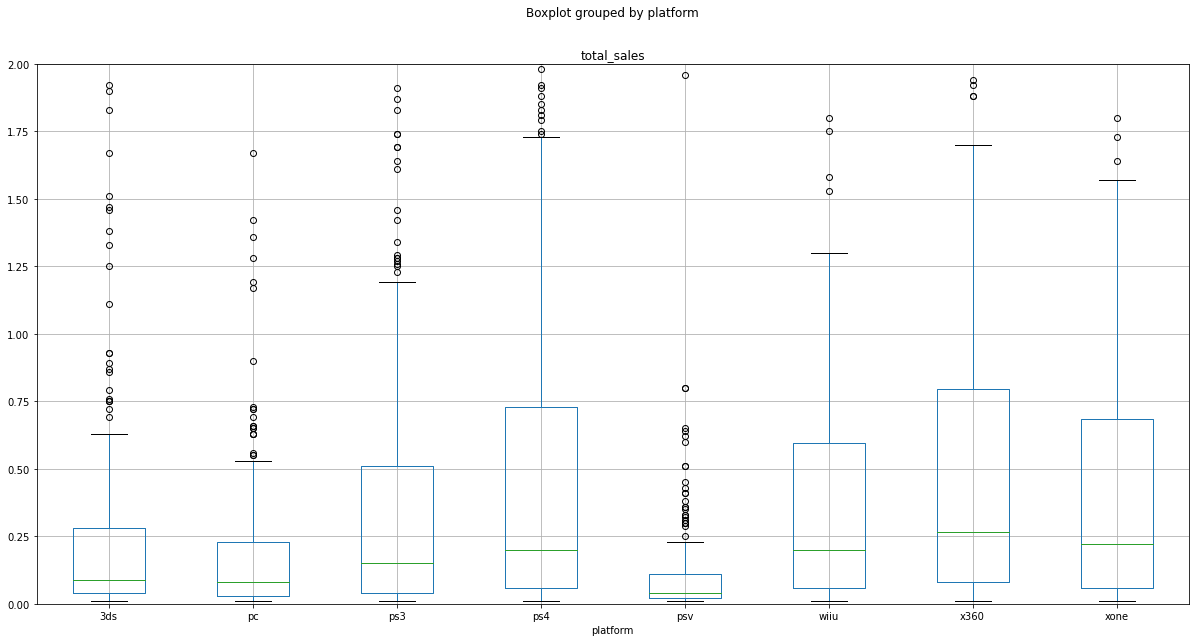

In [22]:
ten_years.boxplot(by='platform',column='total_sales',figsize=(20,10))
plt.ylim(0,2)


в целом график подтверждает, то, что мы ранее видели в цифрах ps3,ps4,x360,xone. Кроме того среднее и размах у них больше,чем у прочих платформ

In [23]:
# КОД РЕВЬЮВЕРА

import plotly.express as px

fig = px.box(ten_years, x = 'platform', y = 'total_sales')
fig.show()

In [24]:
# КОД РЕВЬЮВЕРА

sony = ['ps', 'ps2', 'ps3', 'ps4']

import plotly.express as px

fig = px.line(df.query('platform in @sony').pivot_table(index = ['year_of_release', 'platform'], values = 'total_sales', aggfunc = 'sum').reset_index(),
             x = 'year_of_release', y = 'total_sales', color = 'platform', title = 'Изменение продаж по Sony')
fig.show()

In [25]:


df.query('year_of_release > 2013').pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = False)

total_sales
platform             
ps4            288.15
xone           140.36
3ds             86.68
ps3             68.18
x360            48.22
wiiu            42.98
pc              27.05
psv             22.40
wii              5.07
psp              0.36

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Коррелияция продаж в зависимости от оценки критиков равна: 0.4065679020617815
AxesSubplot(0.125,0.125;0.775x0.755)

Коррелияция продаж в зависимости от оценки пользователей равна: -0.03195711020455644
AxesSubplot(0.125,0.125;0.775x0.755)



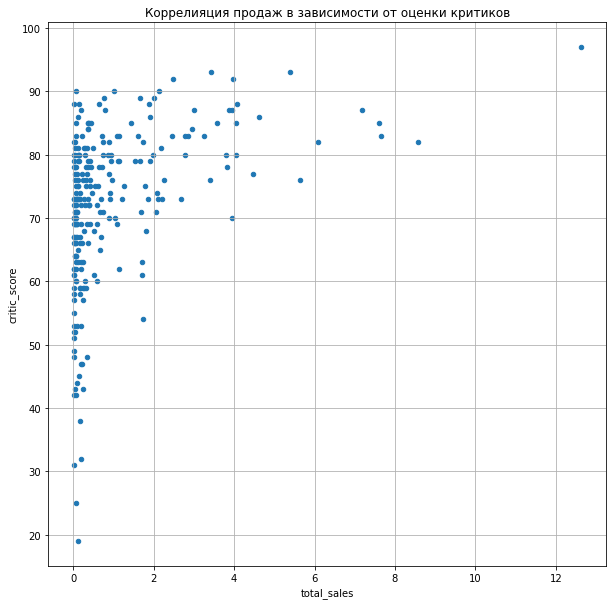

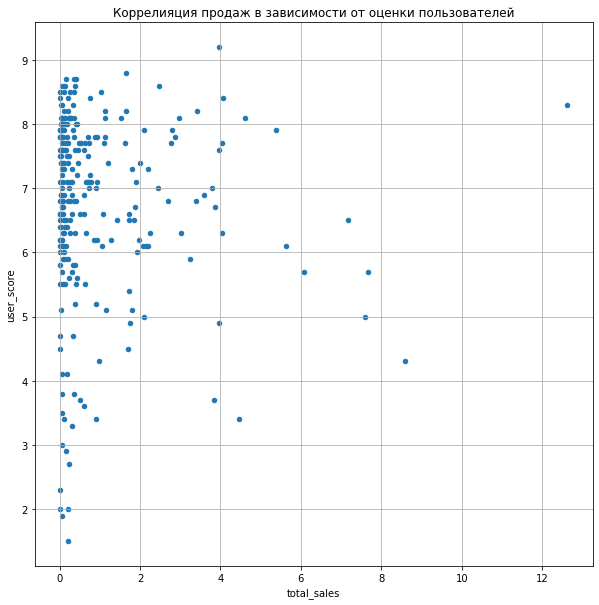

In [26]:
ps4=ten_years.query('platform =="ps4"')
print("Коррелияция продаж в зависимости от оценки критиков равна:",ps4['critic_score'].corr(ps4['total_sales']))
print(ps4.plot(kind='scatter',sharex=False,x='total_sales',y='critic_score',figsize=(10,10),grid=True,title="Коррелияция продаж в зависимости от оценки критиков"))
print()
print("Коррелияция продаж в зависимости от оценки пользователей равна:",ps4['user_score'].corr(ps4['total_sales']))
print(ps4.plot(kind='scatter',sharex=False,x='total_sales',y='user_score',figsize=(10,10),grid=True,title="Коррелияция продаж в зависимости от оценки пользователей"))
print()

Корреляция есть, но она довольно мала

In [27]:
for platform in ten_years['platform'].unique():
    data=ten_years[ten_years['platform']==platform]
    print("корреляция продаж",platform, " к оценке  критиков",data['critic_score'].corr(data['total_sales']))
    print("корреляция продаж",platform, " к оценке пользователей",data['user_score'].corr(data['total_sales']))
    print()

корреляция продаж ps3  к оценке  критиков 0.33428533933719196
корреляция продаж ps3  к оценке пользователей 0.0023944027357566925

корреляция продаж x360  к оценке  критиков 0.3503445460228666
корреляция продаж x360  к оценке пользователей -0.011742185147181354

корреляция продаж ps4  к оценке  критиков 0.4065679020617815
корреляция продаж ps4  к оценке пользователей -0.03195711020455644

корреляция продаж 3ds  к оценке  критиков 0.3570566142288104
корреляция продаж 3ds  к оценке пользователей 0.2415041177356302

корреляция продаж xone  к оценке  критиков 0.41699832800840153
корреляция продаж xone  к оценке пользователей -0.0689250532827942

корреляция продаж wiiu  к оценке  критиков 0.3764149065423912
корреляция продаж wiiu  к оценке пользователей 0.4193304819266184

корреляция продаж pc  к оценке  критиков 0.19603028294369368
корреляция продаж pc  к оценке пользователей -0.09384186952476743

корреляция продаж psv  к оценке  критиков 0.25474235030686554
корреляция продаж psv  к оценке

доверие к оценке критиков больше

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [28]:
genres=ten_years.pivot_table(index=['genre'],values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)
print(genres)
#print(ten_years.plot(kind='scatter',sharex=False,x='total_sales',y='genre',figsize=(10,10),grid=True,title="Коррелияция продаж в зависимости от жанра"))

fig = px.bar(genres.reset_index(), x = 'genre', y = 'total_sales', color = 'total_sales')
fig.show()

              total_sales
genre                    
action             317.69
shooter            232.98
sports             148.98
role-playing       144.86
misc                55.51
racing              39.89
platform            39.69
fighting            35.29
adventure           22.72
simulation          21.41
strategy             9.80
puzzle               3.17


Среди жанров есть явные фовариты и аутсайдеры

### Составим портрет пользователя каждого региона
<a id='2'></a>

In [29]:
ten_years['rating'].unique()

array(['M', 'undefind', 'E', 'T', 'E10+'], dtype=object)

In [30]:
ESRB=[['E',0],
      ['M',17],
      ['undefind','UNKNOWN'],
      ['T',13],
      ['E10+',10],
      ['EC',3]]
Columns=['rating','years_from']
rating_in_years=pd.DataFrame(data=ESRB,columns=Columns)

In [31]:
ten_years=ten_years.merge(rating_in_years,on='rating',how='left')

Text(0.5, 1.0, 'Популярность платформ по регионам')

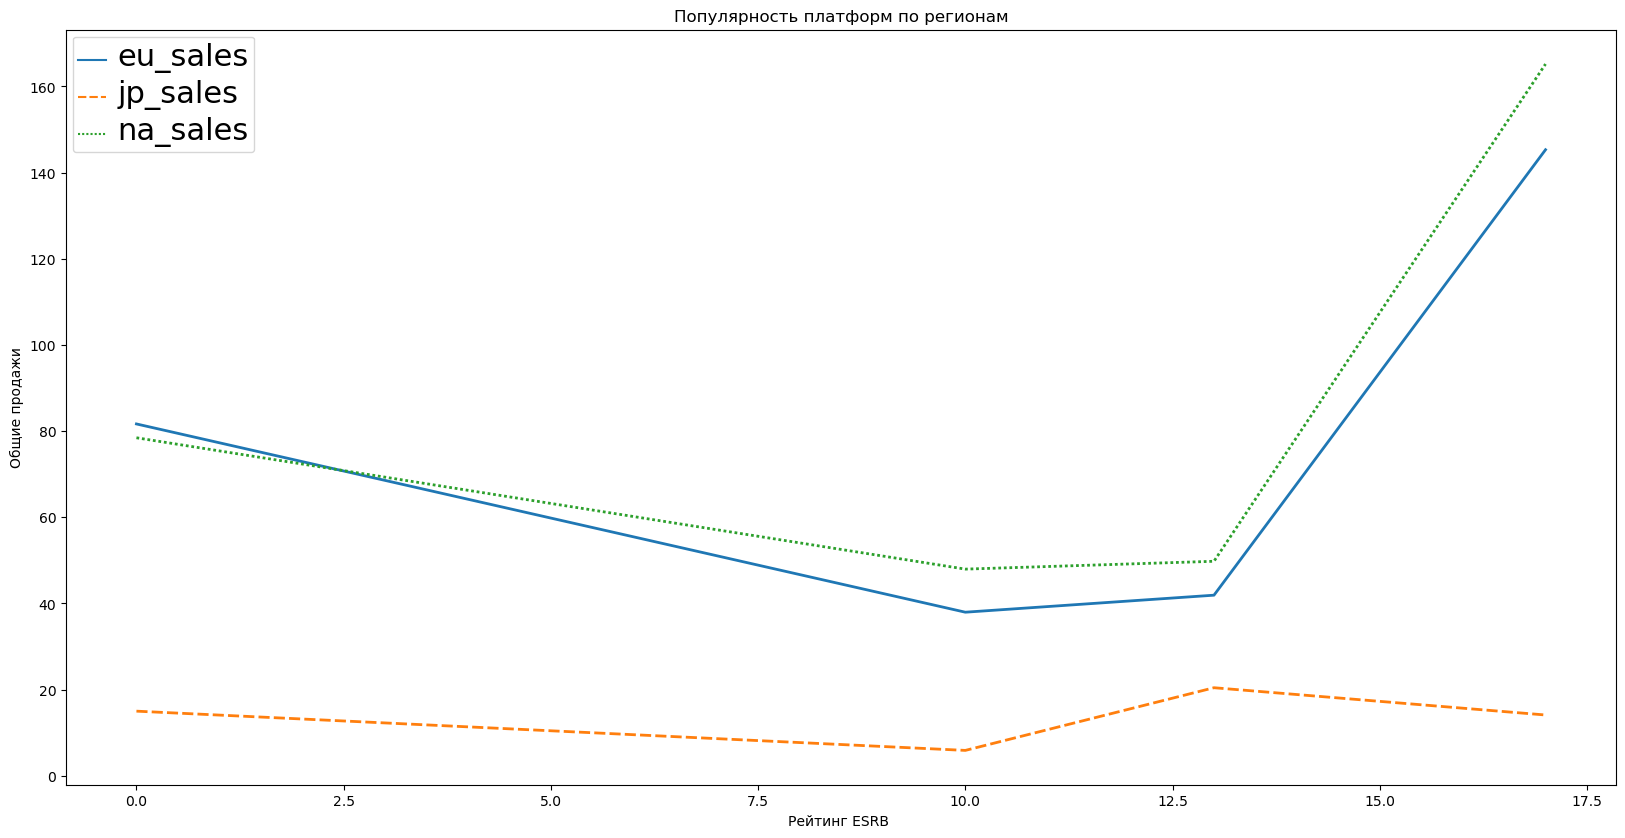

In [32]:
plt.figure(figsize=(20,10),dpi=100)
ax=sns.lineplot(data=ten_years.query('years_from!="UNKNOWN"').pivot_table(index=['years_from'],values=['na_sales','eu_sales','jp_sales'],aggfunc='sum'),hue=['na_sales','eu_sales','jp_sales'],linewidth = 2)
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
plt.xlabel('Рейтинг ESRB ')
plt.ylabel('Общие продажи')
plt.title('Популярность платформ по регионам')

Чем больше возрастное ограничение,тем популярнее игры

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
При этом мы видим, что для Америки и Европы игры с высоким рейтингом имеют большие продажи, тогда как для Японии лидирует не такой высокий рейтинг
</div>

Text(0.5, 1.0, 'Популярность платформ по регионам')

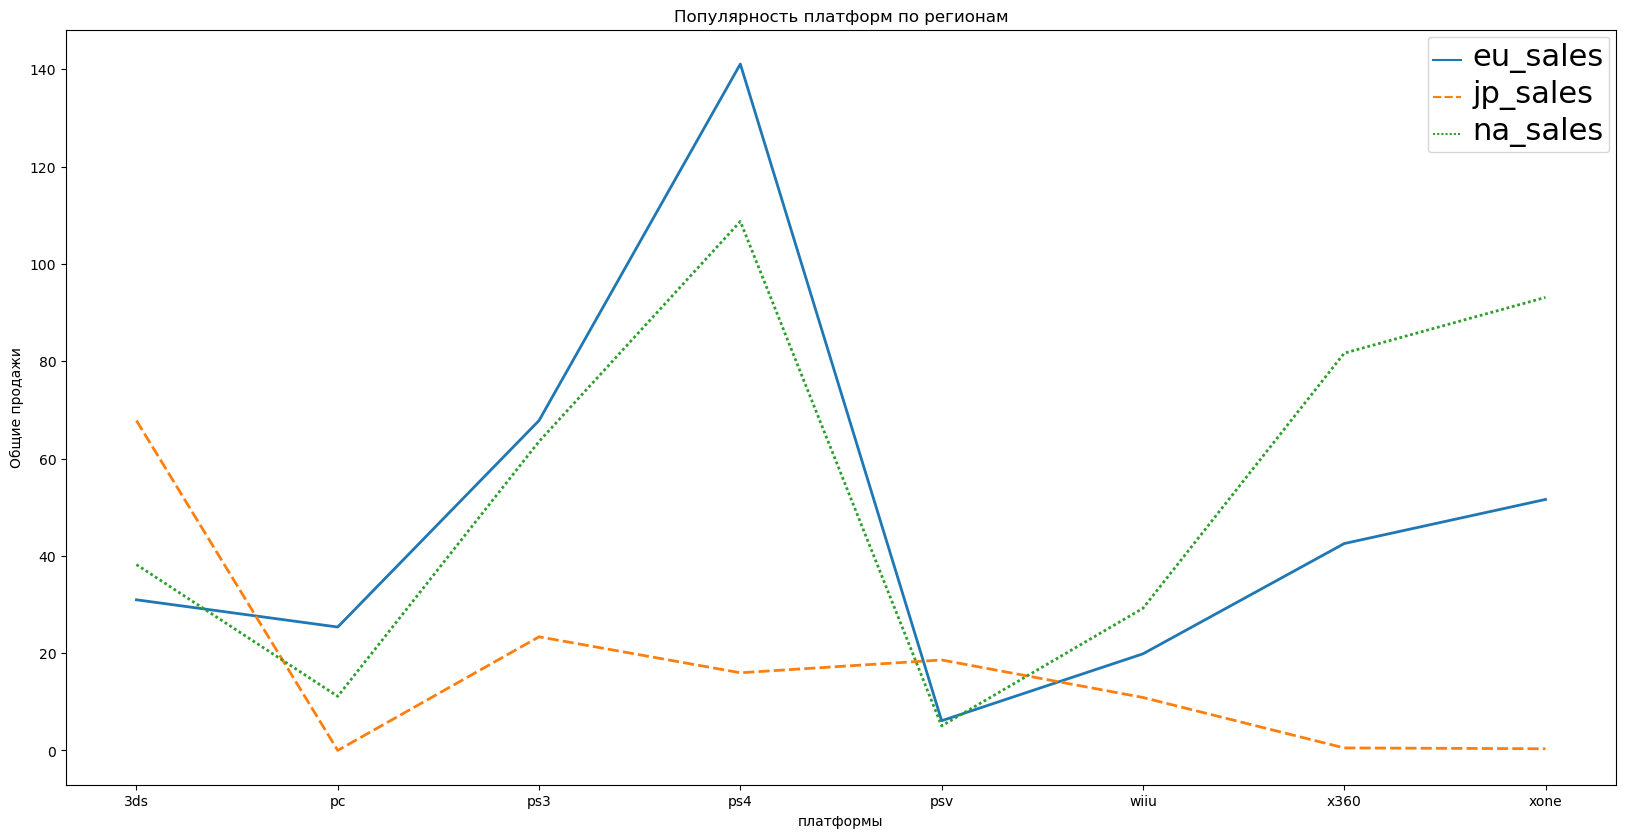

In [33]:
plt.figure(figsize=(20,10),dpi=100)
ax=sns.lineplot(data=ten_years.pivot_table(index=['platform'],values=['na_sales','eu_sales','jp_sales'],aggfunc='sum'),hue=['na_sales','eu_sales','jp_sales'],linewidth = 2)
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
plt.xlabel('платформы')
plt.ylabel('Общие продажи')
plt.title('Популярность платформ по регионам')

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
Видим, что Америка и Европа очень схожи, обе склоняются к стационарным консолям, тогда как Япония любит портативные устройства
    
</div>

Text(0.5, 1.0, 'Популярность платформ по жанрам')

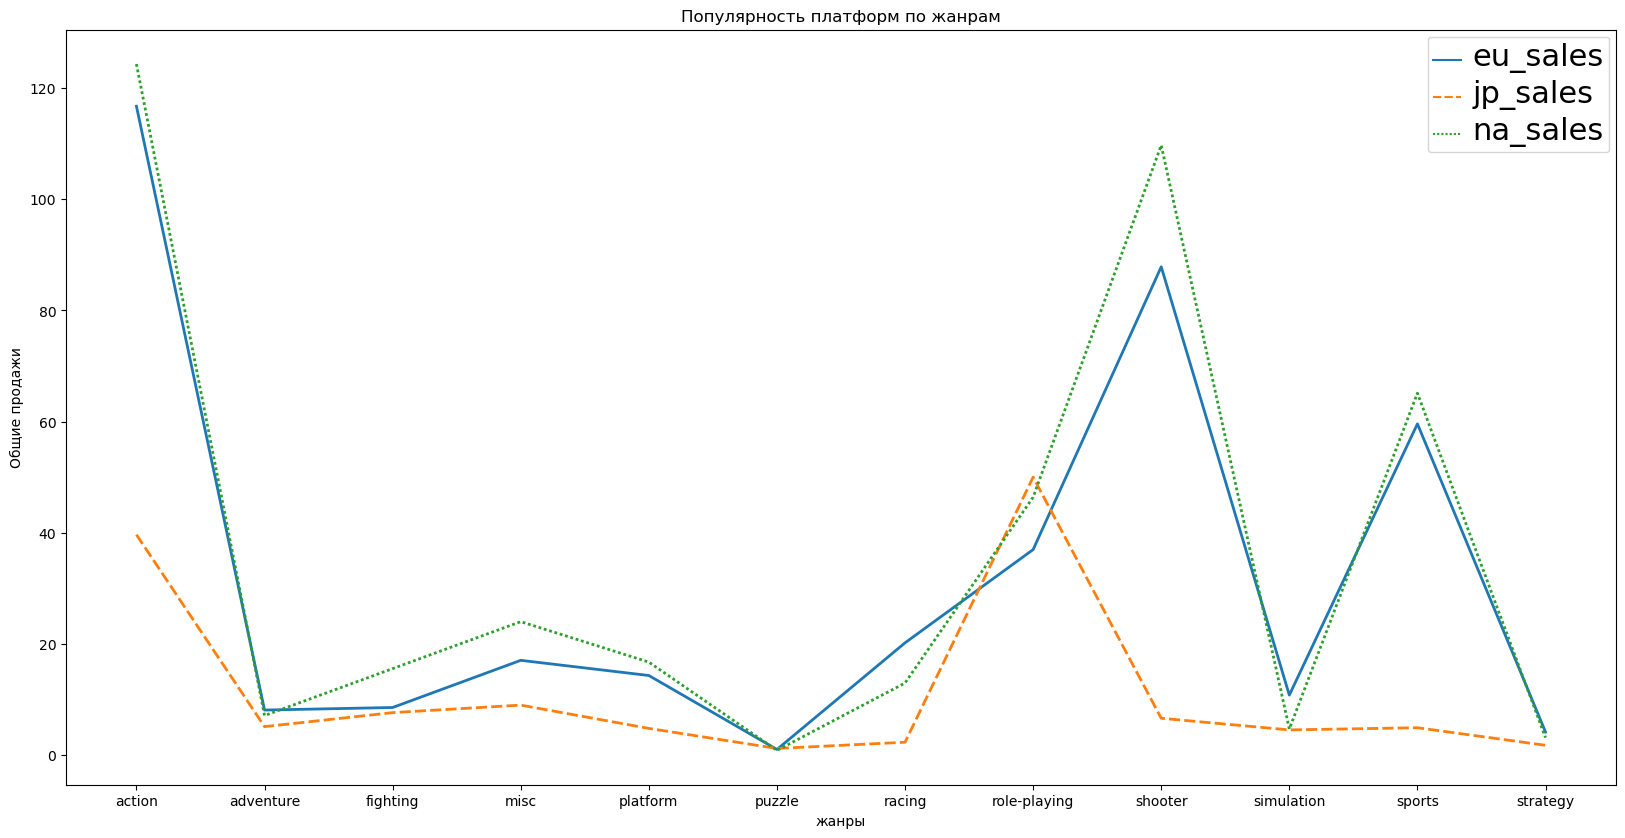

In [34]:
plt.figure(figsize=(20,10),dpi=100)
ax=sns.lineplot(data=ten_years.pivot_table(index=['genre'],values=['na_sales','eu_sales','jp_sales'],aggfunc='sum'),hue=['na_sales','eu_sales','jp_sales'],linewidth = 2)
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
plt.xlabel('жанры')
plt.ylabel('Общие продажи')
plt.title('Популярность платформ по жанрам')

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
Америка и Европа в большей степени склоняются к более динамичным играм с высоким возрастным рейтингом
    
</div>

In [35]:
for i in ['na_sales','eu_sales','jp_sales']:
    print('Самые популярные платформы для и жанры для региона',i)
    print(ten_years.pivot_table(index=['platform'],values=i,aggfunc='sum').sort_values(by=i,ascending=False).head(5))
    print(ten_years.pivot_table(index=['genre'],values=i,aggfunc='sum').sort_values(by=i,ascending=False).head(5))
    print()

Самые популярные платформы для и жанры для региона na_sales
          na_sales
platform          
ps4         108.74
xone         93.12
x360         81.66
ps3          63.50
3ds          38.20
              na_sales
genre                 
action          124.35
shooter         109.74
sports           65.12
role-playing     46.40
misc             24.00

Самые популярные платформы для и жанры для региона eu_sales
          eu_sales
platform          
ps4         141.09
ps3          67.81
xone         51.59
x360         42.52
3ds          30.96
              eu_sales
genre                 
action          116.76
shooter          87.86
sports           59.60
role-playing     36.97
racing           20.19

Самые популярные платформы для и жанры для региона jp_sales
          jp_sales
platform          
3ds          67.81
ps3          23.35
psv          18.59
ps4          15.96
wiiu         10.88
              jp_sales
genre                 
role-playing     50.01
action           39.65
misc 

NA и EU регионы немного похожи, тогда как JP сильно отличается. Предположительно Япония сильно специфичный рынок, к тому же,похоже,там меньше играют впринципе

### Проверим гипотезы:
<a id='3'></a>
Тест 1
H0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H1:Средние пользовательские рейтинги платформ Xbox One и PC разныеые

c

Мы будем проверять H0 в первом и во втором случае. В случае подтверждения H0- H1 будет отброшена, и наоборот

Тест 1
H0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H1:Средние пользовательские рейтинги платформ Xbox One и PC разныеые

In [36]:
rating_Xbox=ten_years.query('platform=="xone"')
rating_PC=ten_years.query('platform=="pc"')
alpha=0.05

result=scipy.stats.ttest_ind(rating_Xbox['user_score'].dropna(),rating_PC['user_score'].dropna(),equal_var=False)
print('p-value',result.pvalue)
if(result.pvalue<alpha):
    print('отвергаем нулевую гипотезу')
else:
    print('не отвергаем нулевую гипотезу')

p-value 0.14759594013430463
не отвергаем нулевую гипотезу


In [37]:
# КОД РЕВЬЮВЕРА

levene = st.levene(rating_Xbox['user_score'].dropna(),rating_PC['user_score'].dropna())
alpha = 0.05
print('p-значение для теста Левене:', levene.pvalue)
if levene.pvalue < alpha:
    print('Гипотеза о равенстве дисперсий не нашла подтверждения')
else:
    print('Отвергнуть гипотезу о равенстве дисперсий не удалось')
    
# таким образом equal_var = False (я подправил код в теле твоего стат теста + дропнул пропуски)

p-значение для теста Левене: 0.003897553110130418
Гипотеза о равенстве дисперсий не нашла подтверждения


Тест 2
H0:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
H1:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [38]:
#rating_Action=ten_years.query('platform=="action"')
#rating_Sport=ten_years.query('platform=="sports"')

rating_Action=ten_years.query('genre=="action"')
rating_Sport=ten_years.query('genre=="sports"')

alpha=0.05

# result=scipy.stats.ttest_ind(rating_Action['user_score'],rating_Sport['user_score'],equal_var=True)
result=scipy.stats.ttest_ind(rating_Action['user_score'].dropna(),rating_Sport['user_score'].dropna(),equal_var=False)
print('p-value',result.pvalue)
if(result.pvalue<alpha):
    print('отвергаем нулевую гипотезу')
else:
    print('не отвергаем нулевую гипотезу')

p-value 6.50128644950287e-20
отвергаем нулевую гипотезу


In [39]:
# КОД РЕВЬЮВЕРА

levene = st.levene(rating_Action['user_score'].dropna(), rating_Sport['user_score'].dropna())
alpha = 0.05
print('p-значение для теста Левене:', levene.pvalue)
if levene.pvalue < alpha:
    print('Гипотеза о равенстве дисперсий не нашла подтверждения')
else:
    print('Отвергнуть гипотезу о равенстве дисперсий не удалось')
    
# таким образом equal_var = False (я подправил код в теле твоего стат теста + дропнул пропуски)

p-значение для теста Левене: 4.373273322053394e-07
Гипотеза о равенстве дисперсий не нашла подтверждения


### Общй вывод <a id='4'></a>
Прежде всего с 2007 года рынок игр находится в падении.Жизненый цикл платформы в среднем 10 лет, и текущие платформы так же прошли пик своей популярности. Ставки стоит делать на XBOX и PS. PC-не устаревает как класс,не смотря на постоянное обновление моделей. 
Так же можно сказать что рынок JP очень особенные и требует отдельного подхода.
По результатам статистических тестов мы выяснили,что:
1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2.Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») РАЗЛИЧНЫ

